### Instructions
+ Type your name and student ID above.
+ Answer the quiz questions in the answer book. For Python programming questions, write your answers in this Jupyter notebook (code and explanations).
+ Submit your Jupyter notebook on iSpace before the end of the quiz.
+ Make sure to submit the right file (the one containing your answers) and that the file can be opened and run without problem.

### Rules

+ This is a closed-book classroom quiz: no personal phone/tablet/laptop, no handwritten notes, no lecture notes, no internet browsing, no AI tools, no copying.

---

### **Question 1a)**

By definition, the **machine precision** is the lowest positive number $\varepsilon_1>0$ such that $1+\varepsilon_1>1$ in practice on a computer, when using floating-point arithmetic. <br>
Any value $0<e<\varepsilon_1$ is such that $1+e$ is truncated down to $1$, due to the **limited precision** of all float types. <br>
In particular, the value of the machine precision depends on the float type considered (the more bits to store float numbers, the smaller the machine precision number).

---

### **Question 1b)**

In [1]:
import numpy as np
print(np.finfo(np.float64))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



The 64-bit float machine precision can be read from this table. It is equal to $2.2204460492503131e-16$. Note that it can also be obtained from $\mathtt{np.spacing(1)}$.<!-- solution file -->

---

### **Question 2**

In [11]:
import numpy as np
A1 = np.array([
    [2.0, 0.0], 
    [0.0, 2.0]]
)
A2 = np.array([
    [10**10,       0.0], 
    [   0.0, 10**(-10)]]
)

In [12]:
print(np.linalg.cond(A1))
print(np.linalg.cond(A2))

1.0
1e+20


The **condition number** of matrix $\mathbf{A_1}$ is $1$, while the **condition number** of matrix $\mathbf{A_2}$ is ${10}^{20}$.<br>
This means that matrix $\mathbf{A_1}$ is much, much better conditioned than matrix $\mathbf{A_2}$. <br>
By definition, the condition number of the linear system **P1** is equal to the condition number of matrix $\mathbf{A_1}$ (equal to $1$), while the condition number of the linear system **P2** is equal to the condition number of matrix $\mathbf{A_2}$ (equal to ${10}^{20}$). <br>
This means that problem **P1** is **well-conditioned**, while problem **P2** is (very) **ill-conditioned**. <br>
This means that tiny changes to the values in the matrix $\mathbf{A_2}$ or the vector $\mathbf{b}$ can cause huge relative changes to the solution $x$ of problem **P2** (by a factor lower than or equal to ${10}^{20}$). <br>
By contrast, problem **P1** does not suffer from this problem.

---

### **Question 3a)**

The most accurate number is $\mathtt{f64}$ as it is stored in 64 bits (8 bytes), which is more than $\mathtt{f32}$ (stored in 32 bits) and $\mathtt{f16}$ (stored in 16 bits). <br>
The more bits used to store a float number, the smaller the **float-rounding errors** necessary to store it, and therefore the more accurate it is. From here onwards we set $\mathtt{fbenchmark=f64}$.

---

### **Question 3b)**

The relative errors of $\mathtt{f16}$ and $\mathtt{f32}$ are defined by $\frac{\left|\mathtt{f16}-\mathtt{f64}\right|}{\mathtt{f64}}$ and $\frac{\left|\mathtt{f32}-\mathtt{f64}\right|}{\mathtt{f64}}$ respectively. The following code computes them:<!-- solution file -->

In [3]:
import numpy as np
def f(a, p, astype):
   a = astype(a) # convert a to the type defined by astype
   p = astype(p) # convert p to the type defined by astype
   one = astype(1.0) # convert 1.0 to the type defined by astype 
   return a * ( np.log(np.exp(p) + one) - p ) # function definition

In [4]:
f16 = f( 2**15, 11, np.float16 ) # using float16 type
f32 = f( 2**15, 11, np.float32 ) # using float32 type 
f64 = f( 2**15, 11, np.float64 ) # using float64 type

In [13]:
print(f16,f32,f64)

0.0 0.5625 0.5472767612664029


In [ ]:
re32 = np.abs(f32-f64)/f64 # relative error of f32, using f64 as benchmark
re16 = np.abs(f16-f64)/f64 # relative error of f16, using f64 as benchmark
print(re32,re16) # relative errors

We see that $\mathtt{f32}$ has a 2.78% relative error compared to $\mathtt{f64}$, while $\mathtt{f16}$ has a 100% relative error.<br>
Indeed, it happens that $\mathtt{f16}=0$. To answer the question, $\color{yellow}\mathtt{\mathbf{f16}} \text{ has the worst relative error}$ . <br>
This is not surprising since $\mathtt{f16}$ is stored in 16 bits only, which is lower than the other two numbers.<br>
However, a 100% relative error is massive, as it means that $\mathtt{f16}$ is completely wrong. <br>
The reason for such a high relative error is that $\color{yellow}\text{the function } f \text{ is numerically unstable}$: 
- the parametric shape of the function greatly amplifies the **float-rounding error** which occurs when adding the large number $e^p$ to the small number $1$.

When using 16-bit floats, the float-rounding error is such that $\mathrm{float}(e^p + 1) = \mathrm{float}(e^p)$, which sets $\mathtt{f16}$ to zero. This is an example of **catastrophic cancellation**.

---

### **Question 4**

In [14]:
import numpy as np
(xmin,xmax) = (0,4)
N = 100
x = np.linspace(xmin,xmax,N+1)
dx = x[1] - x[0] # dx = (xmax - xmin) / N

The following code plots $f(x)$ for $x\in[0,4]$:<!-- solution file -->

<Axes: >

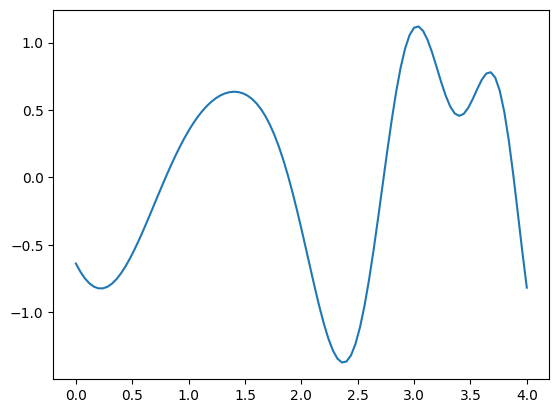

In [15]:
import seaborn as sns

y = 0.5 * np.cos(x ** 2 + x + 1) + np.sin(3 * x - 2)
sns.lineplot(x = x, y = y)

The backward difference approximation of $f^{(1)}(x)$ evaluated at the point $x$ is equal to $\frac{f(x)-f(x-\Delta_x)}{\Delta_x}$ for a small mesh size $\Delta_x>0$. <br>
The following code implements it, and compares it to the anaytical first order derivative $f^{(1)}(x)$ for $x\in[0,4]$.

<Axes: >

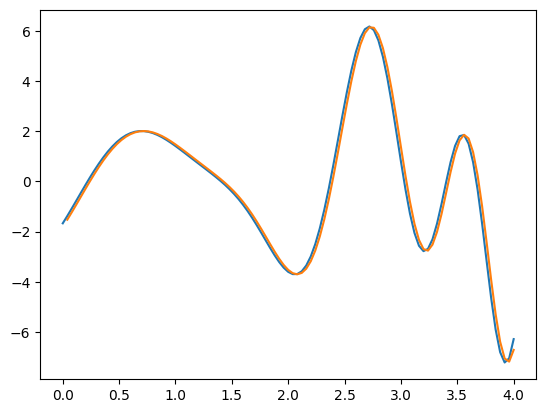

In [16]:
# Exact derivative of f
y1_exact = - (x + 0.5) * np.sin(x ** 2 + x + 1) + 3 * np.cos(3 * x - 2)

# Its approximation by backward difference
y1_backward = (y[1:] - y[:-1]) / dx

# x grid for backward difference
x1 = x[1:]

# Plot exact derivative
sns.lineplot(x = x, y = y1_exact) 

# Plot estimated derivative
sns.lineplot(x = x1, y = y1_backward)


The centered difference approximation of $f^{(2)}(x)$ evaluated at the point $x$ is equal to $\frac{f(x+\Delta_x)-2f(x)+f(x-\Delta_x)}{\Delta_x^2}$ for a small mesh size $\Delta_x>0$. <br>
The following code implements it, and compares it to the anaytical second order derivative $f^{(2)}(x)$ for $x\in[0,4]$.

<Axes: >

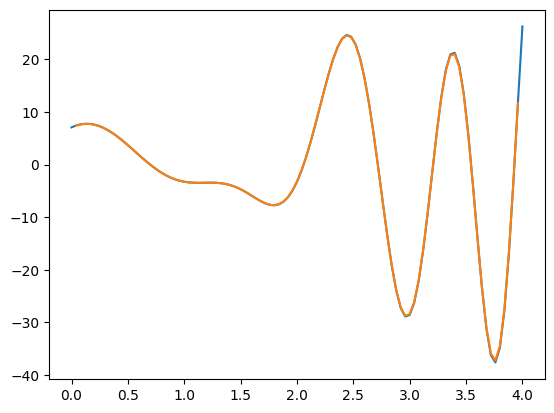

In [17]:
# Exact 2nd derivative of f
y2_exact = - np.sin(x ** 2 + x + 1) - (x + 0.5) * (2 * x + 1) * np.cos(x ** 2 + x + 1) - 9 * np.sin(3 * x - 2)

# Its approximation by centered difference
y2_centered = (y[2:] - 2 * y[1:-1] + y[:-2]) / (dx ** 2)

# x grid for centered difference
x2 = x[1:-1]

# Plot exact 2nd order derivative
sns.lineplot(x = x, y = y2_exact)

# Plot estimated 2nd order derivative
sns.lineplot(x = x2, y = y2_centered)